# Mining the Social Web

## Mining Text Files

This Jupyter Notebook provides an interactive way to follow along with and explore the examples from the book or video series. The intent behind this notebook is to reinforce the concepts in a fun, convenient, and effective way.

## Cleaning HTML content by stripping out HTML tags and converting HTML entities back to plain-text representations

In [5]:
from bs4 import BeautifulSoup # pip install beautifulsoup4

def cleanHtml(html):
    if html == "": return ""

    return BeautifulSoup(html, 'html5lib').get_text()

txt = "Don&#39;t forget about HTML entities and <strong>markup</strong> when "+\
      "mining text!<br />"

print(txt)
print()
print(cleanHtml(txt))

Don&#39;t forget about HTML entities and <strong>markup</strong> when mining text!<br />

Don't forget about HTML entities and markup when mining text!


## Sample data structures used in illustrations for the rest of this chapter

In [6]:
corpus = {
 'a' : "Mr. Green killed Colonel Mustard in the study with the candlestick. \
Mr. Green is not a very nice fellow.",
 'b' : "Professor Plum has a green plant in his study.",
 'c' : "Miss Scarlett watered Professor Plum's green plant while he was away \
from his office last week."
}
terms = {
 'a' : [ i.lower() for i in corpus['a'].split() ], 
 'b' : [ i.lower() for i in corpus['b'].split() ],
 'c' : [ i.lower() for i in corpus['c'].split() ]
 }

## Running TF-IDF on sample data

In [7]:
from math import log

# Enter in a query term from the corpus variable
QUERY_TERMS = ['mr.', 'green']

def tf(term, doc, normalize=True):
    doc = doc.lower().split()
    if normalize:
        return doc.count(term.lower()) / float(len(doc))
    else:
        return doc.count(term.lower()) / 1.0

def idf(term, corpus):
    num_texts_with_term = len([True for text in corpus if term.lower()
                              in text.lower().split()])

    # tf-idf calc involves multiplying against a tf value less than 0, so it's
    # necessary to return a value greater than 1 for consistent scoring.
    # (Multiplying two values less than 1 returns a value less than each of
    # them.)

    try:
        return 1.0 + log(float(len(corpus)) / num_texts_with_term)
    except ZeroDivisionError:
        return 1.0

def tf_idf(term, doc, corpus):
    return tf(term, doc) * idf(term, corpus)

corpus = \
    {'a': 'Mr. Green killed Colonel Mustard in the study with the candlestick. \
Mr. Green is not a very nice fellow.',
     'b': 'Professor Plum has a green plant in his study.',
     'c': "Miss Scarlett watered Professor Plum's green plant while he was away \
from his office last week."}

for (k, v) in sorted(corpus.items()):
    print(k, ':', v)
print()
    
# Score queries by calculating cumulative tf_idf score for each term in query

query_scores = {'a': 0, 'b': 0, 'c': 0}
for term in [t.lower() for t in QUERY_TERMS]:
    for doc in sorted(corpus):
        print('TF({0}): {1}'.format(doc, term), tf(term, corpus[doc]))
    print('IDF: {0}'.format(term), idf(term, corpus.values()))
    print()

    for doc in sorted(corpus):
        score = tf_idf(term, corpus[doc], corpus.values())
        print('TF-IDF({0}): {1}'.format(doc, term), score)
        query_scores[doc] += score
    print()

print("Overall TF-IDF scores for query '{0}'".format(' '.join(QUERY_TERMS)))
for (doc, score) in sorted(query_scores.items()):
    print(doc, score)

a : Mr. Green killed Colonel Mustard in the study with the candlestick. Mr. Green is not a very nice fellow.
b : Professor Plum has a green plant in his study.
c : Miss Scarlett watered Professor Plum's green plant while he was away from his office last week.

TF(a): mr. 0.10526315789473684
TF(b): mr. 0.0
TF(c): mr. 0.0
IDF: mr. 2.09861228866811

TF-IDF(a): mr. 0.22090655670190631
TF-IDF(b): mr. 0.0
TF-IDF(c): mr. 0.0

TF(a): green 0.10526315789473684
TF(b): green 0.1111111111111111
TF(c): green 0.0625
IDF: green 1.0

TF-IDF(a): green 0.10526315789473684
TF-IDF(b): green 0.1111111111111111
TF-IDF(c): green 0.0625

Overall TF-IDF scores for query 'mr. green'
a 0.3261697145966431
b 0.1111111111111111
c 0.0625


## Exploring text data with NLTK

In [8]:
# Explore some of NLTK's functionality by exploring the data.
# Here are some suggestions for an interactive interpreter session.

import json
import nltk

# Download ancillary nltk packages if not already installed
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
# Load in human language data from wherever you've saved it
DATA = 'Data/timoreilly.json'
data = json.loads(open(DATA).read())

In [10]:
print(data)

[{'content': 'This is an excellent account of how the competitive dynamics are shifting in Lyft\'s favor in its ride-sharing battle with Uber. Unfortunately, the analysis of the impact of autonomous cars is shallow. It notes that autonomous vehicles can be "can be utilized nearly 100% of the time." Yet one of the key drivers of the peer-to-peer model is that it pulls in part time workers to address inherently lumpy demand. To have enough autonomous cars to meet peak demand, you have to have way more cars than you need. (I talk about the tradeoffs, and how to properly understand how autonomy intersects with the on-demand business model as one of the many subjects in my forthcoming book WTF: What\'s the Future and Why It\'s Up to Us.) Nonetheless, this is a must-read article on this game changing technology. Some particularly good thoughts from John Zimmer of Lyft on why autonomous vehicles will still create opportunity for human workers.', 'title': "This is an excellent account of how t

In [11]:
# Combine titles and post content
all_content = " ".join([ i['title'] + " " + i['content'] for i in data ])

# Approximate bytes of text
print(len(all_content))

131031


In [13]:
tokens = all_content.split()
text = nltk.Text(tokens)

# Examples of the appearance of the word "open"
text.concordance("open")

Displaying 16 of 16 matches:
, and how at least one team is using open source to let others see inside the 
ear that computational biologist and open science advocate (UC Berkeley profes
ear that computational biologist and open science advocate (UC Berkeley profes
: magazine slogan say, "If you can't open it, you don't own it." Predictive po
 I'm proud to be a signatory to this open letter calling for this key policy i
st, I've focused a lot on areas like open source software and the implications
opic at greater length in my article Open Data and Algorithmic Regulation: htt
cessful participatory projects, from open source software to wikis to social m
ere isn't one (except that it's only open to US students - sorry. If anyone ha
new contract that conformed with the open data mandate. If it were consistent 
If it were consistent with the Obama open data guidance, that RFP would requir
ut of step with the administration’s open data policy.The founder of Hipcamp, 
is is a really importan

In [17]:
# Frequency analysis for words of interest
fdist = text.vocab()
print(fdist["data"])
print(fdist["open"])
print(fdist["source"])
print(fdist["web"])

31
13
5
1


In [18]:
# Number of words in the text
print('Number of tokens:', len(tokens))

Number of tokens: 21758


In [19]:
# Number of unique words in the text
print('Number of unique words:', len(fdist.keys()))

Number of unique words: 5792


In [20]:
# Common words that aren't stopwords
print("Common words that aren't stopwords")
print([w for w in list(fdist.keys())[:100]
   if w.lower() not in nltk.corpus.stopwords.words('english')])

Common words that aren't stopwords
['excellent', 'account', 'competitive', 'dynamics', 'shifting', "Lyft's", 'favor', 'ride...', 'ride-sharing', 'battle', 'Uber.', 'Unfortunately,', 'analysis', 'impact', 'autonomous', 'cars', 'shallow.', 'notes', 'vehicles', '"can', 'utilized', 'nearly', '100%', 'time."', 'Yet', 'one', 'key', 'drivers', 'peer-to-peer', 'model', 'pulls', 'part', 'time', 'workers', 'address', 'inherently', 'lumpy', 'demand.', 'enough', 'meet', 'peak', 'demand,', 'way', 'need.', '(I', 'talk', 'tradeoffs,', 'properly', 'understand', 'autonomy', 'intersects', 'on-demand', 'business', 'many', 'subjects', 'forthcoming', 'book', 'WTF:', "What's", 'Future', 'Us.)', 'Nonetheless,', 'must-read', 'article', 'game', 'changing', 'technology.', 'particularly']


In [21]:
# Long words that aren't URLs
print("Long words that aren't URLs")
print([w for w in fdist.keys() if len(w) > 15 and 'http' not in w])

Long words that aren't URLs
['impossible.Technology', 'financialization,', 'collusion...could', 'transformative.)', 'public-relations', 'self-assessment...', 'self-assessment!', 'forward-thinking', '“attend-listen-embarrass”', 'algorithmically,', 'conversational...', '#OReillySecurity', '#makesecurityeasy', 'doing.Individually,', 'producers....Like', 'entrepreneurship', 'life-threatening', "Thursday.”That's", 'humansofnewyork.com', 'underrepresented', 'Republican-controlled', 'philanthropists,', 'Michener)quoteinvestigator.com/2010/08/27/master/Thanks', '“Areopagitica...', '#FutureCrimesConvo,', 'www.futurecrimes.com', 'statistics:"Typically,', 'Super-interesting.', 'Brothers...."Their', 'innovation-resistant', 'software...."Get', 'Ireland.Incidentally,', 'fundamentally...', 'level-headedness.', 'administration’s', 'jasonmking@fs.fed.us', 'Makers/Exhibitors/Performers,', 'Regulations?Evgeny', "backwards.Here's", 'opens:"Regulation', 'results."Consider,', 'outcome"Real-time', 'achieved"

In [24]:
# Number of URLs
print('Number of URLs: ',len([w for w in fdist.keys() if 'http' in w]))

Number of URLs:  42


In [25]:
# Top 10 Most Common Words
print('Top 10 Most Common Words')
print(fdist.most_common(10))

Top 10 Most Common Words
[('the', 1059), ('to', 624), ('of', 597), ('and', 515), ('a', 447), ('in', 334), ('is', 312), ('for', 264), ('I', 235), ('that', 226)]


In [40]:
# Top 10 Most Common Words that Aren't Stopwords
nltk.download('punkt')
stopwords = nltk.corpus.stopwords.words('english')

filtered_tokenized_text = [word.lower() for word in tokens if word.lower() not in stopwords]
filtered_word_freq = nltk.FreqDist(filtered_tokenized_text)

filtered_word_freq.most_common(10)

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[('new', 69),
 ('one', 54),
 ('us', 54),
 ('like', 53),
 ('good', 48),
 ('piece', 45),
 ('make', 44),
 ('-', 40),
 ("i'm", 40),
 ('love', 40)]

## Querying text data with TF-IDF

In [ ]:
# Provide your own query terms here

QUERY_TERMS = ['Government']

# Load in human language data from wherever you've saved it
DATA = 'Data/timoreilly.json'
data = json.loads(open(DATA).read())

activities = [post['content'].lower().split() 
              for post in data 
                if post['content'] != ""]

# TextCollection provides tf, idf, and tf_idf abstractions so
# that we don't have to maintain/compute them ourselves

tc = nltk.TextCollection(activities)

relevant_activities = []

for idx in range(len(activities)):
    score = 0
    for term in [t.lower() for t in QUERY_TERMS]:
        score += tc.tf_idf(term, activities[idx])
    if score > 0:
        relevant_activities.append({'score': score, 'title': data[idx]['title']})

# Sort by score and display results

relevant_activities = sorted(relevant_activities,
                             key=lambda p: p['score'], reverse=True)
for activity in relevant_activities:
    print('Title: {0}'.format(activity['title']))
    print('Score: {0}'.format(activity['score']))
    print()

## Finding similar documents using cosine similarity

The dot product of two vectors __A__ and **B** can be thought of as a projection of one vector into the other.
<img src="Images/dot_product.png">

By measuring how much of **A** is in the same direction as **B**, we get a measure of how similar **A** is to **B**. The idea behind the following exercise is to create vectors for each document in our corpus consisting of the TF-IDF scores of the terms in those documents:

```
v_1 = [ tf_idf(term_1, doc_1), tf_idf(term_2, doc_1), ..., tf_idf(term_n, doc_1) ]
v_2 = [ tf_idf(term_1, doc_2), tf_idf(term_2, doc_2), ..., tf_idf(term_n, doc_2) ]
```

The dot product of these vectors:

$\mathbf{v_1} \cdot \mathbf{v_2} = |\mathbf{v_1}||\mathbf{v_2}|\cos(\theta)$.

Now you see where the cosine comes in. The "cosine distance" between $\mathbf{v1}$ and $\mathbf{v2}$ is then given by

$$
d = 1 - \frac{\mathbf{v_1} \cdot \mathbf{v_2}}{|\mathbf{v_1}||\mathbf{v_2}|}
$$

### Build a Term-Document Matrix

**Documents**

D1 = "I like databases"

D2 = "I hate databases"

Then the term-document matrix would be:

| * | I | like | hate | databases |
|---|---|------|------|-----------|
|D1 | 1	| 1    | 0    |     1     |
|D2	| 1	| 0	   | 1    |  1        |


In [46]:
import json
import nltk
import nltk.cluster

# Load in human language data from wherever you've saved it
DATA = 'Data/timoreilly.json'
data = json.loads(open(DATA).read())

all_posts = [ (i['title'] + " " + i['content']).lower().split() for i in data ]

# Provides tf, idf, and tf_idf abstractions for scoring

tc = nltk.TextCollection(all_posts)

# Compute a term-document matrix such that td_matrix[doc_title][term]
# returns a tf-idf score for the term in the document

td_matrix = {}
for idx in range(len(all_posts)):
    post = all_posts[idx]
    fdist = nltk.FreqDist(post)

    doc_title = data[idx]['title'].replace('\n', '')
    td_matrix[doc_title] = {}

    for term in fdist.keys():
        td_matrix[doc_title][term] = tc.tf_idf(term, post)

In [44]:
# Build vectors such that term scores are in the same positions...
distances = {}
for title1 in td_matrix.keys():

    distances[title1] = {}
    (min_dist, most_similar) = (1.0, ('', ''))

    for title2 in td_matrix.keys():

        # Take care not to mutate the original data structures
        # since we're in a loop and need the originals multiple times

        terms1 = td_matrix[title1].copy()
        terms2 = td_matrix[title2].copy()

        # Fill in "gaps" in each map so vectors of the same length can be computed
        for term1 in terms1:
            if term1 not in terms2:
                terms2[term1] = 0

        for term2 in terms2:
            if term2 not in terms1:
                terms1[term2] = 0

        # Create vectors from term maps
        v1 = [score for (term, score) in sorted(terms1.items())]
        v2 = [score for (term, score) in sorted(terms2.items())]

        # Compute similarity amongst documents
        distances[title1][title2] = nltk.cluster.util.cosine_distance(v1, v2)

        if title1 == title2:
            #print distances[title1][title2]
            continue

        if distances[title1][title2] < min_dist:
            (min_dist, most_similar) = (distances[title1][title2], title2)

    print(u'Most similar (score: {})\n(1) {}\n(2) {}\n'.format(1-min_dist, title1, most_similar))

Most similar (score: 0.0971495885458028)
(1) This is an excellent account of how the competitive dynamics are shifting in Lyft's favor in its ride...
(2) As Jason Tanz of Wired, who urged me to write this piece, summarized its argument: "Uber was the product...

Most similar (score: 0.09567029049269082)
(1) Billionaire Nick Hanauer has some blistering advice for his fellow plutocrats on the left. If you want...
(2) Nick Hanauer is so quotable. He talks “Trickle down clowns,” wage suppression, and corporate welfare...

Most similar (score: 0.11319350317462973)
(1) Cheryl Platz, former senior UX designer on Amazon's Alexa platform team, recently spoke with O'Reilly...
(2) My thoughts on conversational interfaces, and why Alexa is now the market leader. If Siri, Google Now...

Most similar (score: 0.15556848369037235)
(1) Brett Goldstein gives some excellent advice on basic security hygiene. It the most obvious cure for ...
(2) Worried about predictive policing? This profile of Civicscape

Most similar (score: 0.08085987881349377)
(1) I’ve been eagerly awaiting the public release of Steve Ballmer’s USAFacts project, and now it’s here...
(2) We just unveiled the project I've been working on for the past six months or so (really, the past couple...

Most similar (score: 0.16954994453984695)
(1) This sequence of tweets from Dan Hon about the algorithmic fiasco at United is hilarious and insightful...
(2) Join Dan Dan Kaminsky for the #OReillySecurity hackathon happening now through the end of the week at...

Most similar (score: 0.07336415268492669)
(1) This is an excellent piece on continuous delivery and business transformation at IBM, and the relationship...
(2) Why Common Core is Like Healthcare.govDraw a bold line between this piece on the failure of the Common...

Most similar (score: 0.08278100805238864)
(1) This is the best piece I've read yet on the post-truth world, tongue-in-cheek yet full of truths to ...
(2) This is a very good explainer piece about filter bubb

Most similar (score: 0.05242725356305522)
(1) "It’s billions with a B,” said a cable executive, adding “there’s no business incentive to do so.” What's...
(2) Absolutely brilliant piece about complexity, public policy, and business From #NextEconomy speaker Esko...

Most similar (score: 0.16954994453984695)
(1) Join Dan Dan Kaminsky for the #OReillySecurity hackathon happening now through the end of the week at...
(2) This sequence of tweets from Dan Hon about the algorithmic fiasco at United is hilarious and insightful...

Most similar (score: 0.265269798014918)
(1) Start-Up & Vote is a movement to encourage tech communities to vote early and vote together. Get a group...
(2) My Ride To Vote has created a crowdfunding campaign to fund a Get Out The Vote effort for Hillary in...

Most similar (score: 0.1315136469006879)
(1) I was one of the warmup acts for President Obama at his Frontiers Conference on Science and Technology...
(2) A good example of why you can think of edge.org as TED

Most similar (score: 0.1289849584324121)
(1) Nassau, The Bahamas Airport Travel AdviceIf anyone happens to travel to Nassau, the Bahamas, I thought...
(2) The other morning, before speaking at a Google event at Cavallo Point, +Jen Pahlka and I went for a ...

Most similar (score: 0.09519362990836289)
(1) Amazing story about digital transformation http://www.codeforamerica.org/blog/2015/11/30/a-new-approach...
(2) Why Common Core is Like Healthcare.govDraw a bold line between this piece on the failure of the Common...

Most similar (score: 0.14045353583708575)
(1) Cool use of Minecraft for conservation!
(2) This is a very cool demo by of musical programming from #OSCON. 

Most similar (score: 0.20475711631642446)
(1) Safari is O'Reilly's subscription access program - thousands of hours of video (including full video...
(2) The deep learning video collection from O'Reilly Media makes me wish I had more hours in the day. It's...

Most similar (score: 0.07874586937950323)
(1) John Oliver: 

Most similar (score: 0.07112118500923914)
(1) This just in from my friend +Brian Forde:"A couple of weeks ago we announced $75,000 in scholarships...
(2) A couple of weeks ago, I sat down with New York Times senior editor Charles Duhigg at the Aspen Ideas...

Most similar (score: 0.09340669603706864)
(1) Lovely quote from Wallace Stevens: "“One may find intimations of immortality in an object on the mantelpiece...
(2) Lovely paean to the jobs of book collecting!This is what Milton means in his sublime “Areopagitica...

Most similar (score: 0.11126760278618619)
(1) My new essay on what I've been calling "The WTF Economy." (In case you missed it, the first essay is...
(2) This 1993 essay by Robert Putnam (who later wrote the classic book Bowling Alone) on social capital,...

Most similar (score: 0.08901591406618592)
(1) Love this from +Liza Daly: "If you have a responsibility for hiring people, at any level, you have one...
(2) This is a good summary of one of those fresh ideas that will

Most similar (score: 0.05807991956198222)
(1) Utterly magnificent views on the hike up from Urubamba to Maras.
(2) "You can add up all the yearly visitors to the city's baseball stadiums, its basketball and hockey arenas...

Most similar (score: 0.04507839096761901)
(1) That's a heck of a collection! Clever idea to display their impounded blades!
(2) Who will build the “god platform” for the Internet of Things?The idea that everyone will have a separate...

Most similar (score: 0.07807772698471893)
(1) Texas has nothing on Peru. They like their Coca-Cola big down here!
(2) I like to think that O'Reilly books are always a great value, but when they go on special sale, like...

Most similar (score: 0.08506276193387052)
(1) Brilliant remarks by +Mikey D about what he learned from the healthcare.gov rescue and why he left Google...
(2) Absolutely brilliant piece about complexity, public policy, and business From #NextEconomy speaker Esko...

Most similar (score: 0.21338419251735785)
(1) Fa

Most similar (score: 0.07747434397861308)
(1) Johnny McGuire, the owner of the wonderful Bricin restaurant in Killarney, told me how moved he was ...
(2) Back now from a wonderful holiday in Ireland.  It included a "Hawk Walk" in Killarney with Killarney...

Most similar (score: 0.07407012255090584)
(1) This piece about @jgrahamc's campaign to get the UK gov to apologize to Alan Turing shows why +Steven...
(2) Fascinating history of the lobbying campaign that took streets away from pedestrians and gave them to...

Most similar (score: 0.1912748055663296)
(1) And here's a view of Loch Leine, from the same spot in Killarney.
(2) View of Torc, which rises over Muckross Lake, from atop a ruin in Killarney. Stunning!I grew up with...

Most similar (score: 0.1912748055663296)
(1) View of Torc, which rises over Muckross Lake, from atop a ruin in Killarney. Stunning!I grew up with...
(2) And here's a view of Loch Leine, from the same spot in Killarney.

Most similar (score: 0.08677466614318508

Most similar (score: 0.10306499288773607)
(1) Live for stream the #CfASummit starting at 2:30 pm PDT.@pahlkadot opens, talking about current @codeforamerica...
(2) I was on KQED Forum this morning, talking with Michael Krasny about technology and the future of work...

Most similar (score: 0.11521742968329918)
(1) Who will build the “god platform” for the Internet of Things?The idea that everyone will have a separate...
(2) There are many directions this article could have gone - the difference in platform philosophy between...

Most similar (score: 0.08881677456732517)
(1) Top of the new World Trade Center wreathed in clouds. From the 9/11 Memorial
(2) +Jennifer Pahlka and I share a moment of joy at the top of Warmiwanuska Pass, the highest point on the...

Most similar (score: 0.11757856802063882)
(1) If we are going to transform government, we need both an inside game and an outside game.The inside...
(2) This was my favorite piece in this Sunday's New York Times. It's a fascinating

## Generating a figure to visually display the cosine similarity between documents

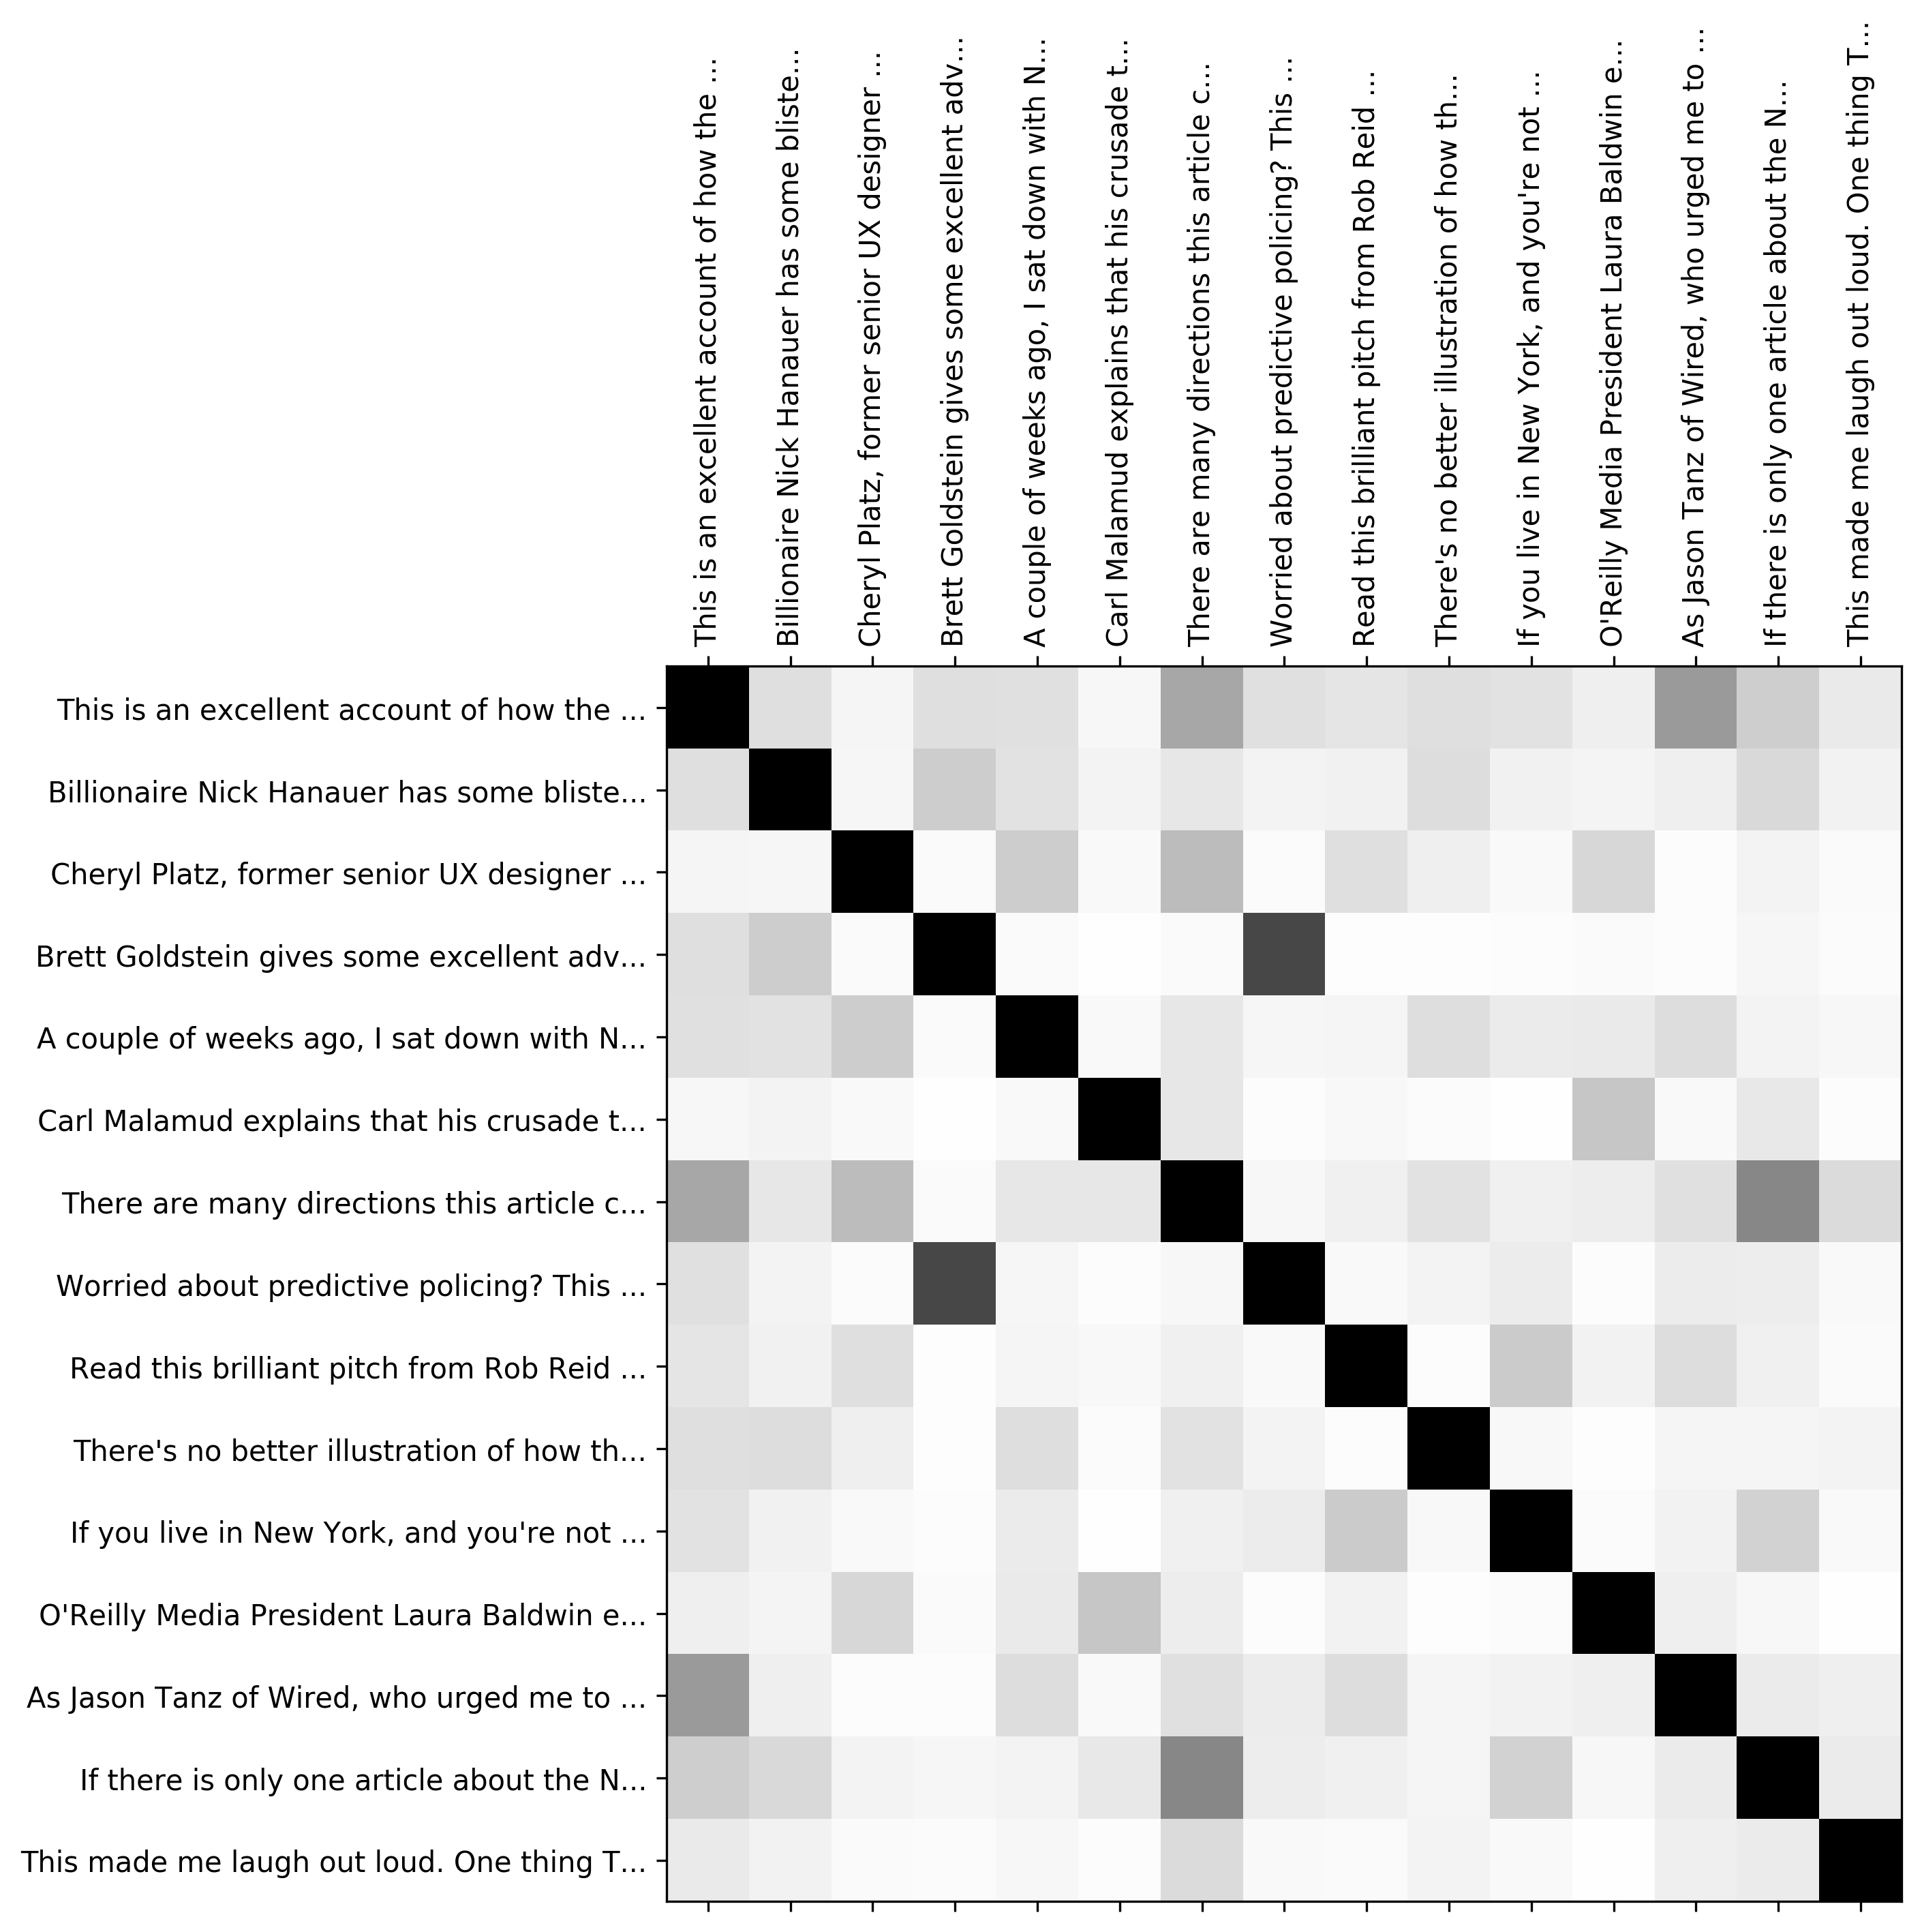

In [45]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

max_articles = 15

# Get the titles - the keys to the 'distances' dict
keys = list(distances.keys())

# Extract the article titles
titles = [l[:40].replace('\n',' ')+'...' for l in list(distances.keys())]

n_articles = len(titles) if len(titles) < max_articles else max_articles

# Initialize the matrix of appropriate size to store similarity scores
similarity_matrix = np.zeros((n_articles, n_articles))

# Loop over the cells in the matrix
for i in range(n_articles):
    for j in range(n_articles):
        # Retrieve the cosine distance between articles i and j
        d = distances[keys[i]][keys[j]]
        
        # Store the 'similarity' between articles i and j, defined as 1.0 - distance
        similarity_matrix[i, j] = 1.0 - d


# Create a figure and axes
fig = plt.figure(figsize=(8,8), dpi=300)
ax = fig.add_subplot(111)

# Visualize the matrix with colored squares indicating similarity
ax.matshow(similarity_matrix, cmap='Greys', vmin = 0.0, vmax = 0.2)

# Set regular ticks, one for each article in the collection
ax.set_xticks(range(n_articles))
ax.set_yticks(range(n_articles))

# Set the tick labels as the article titles
ax.set_xticklabels(titles)
ax.set_yticklabels(titles)

# Rotate the labels on the x-axis by 90 degrees
plt.xticks(rotation=90);

## Using NLTK to compute collocations for a corpus

In [49]:
from nltk import BigramCollocationFinder

def generate_collocations(tokens, top_n=5):
    '''
    Given list of tokens, return collocations.
    '''
    print('Generating list of top {} pairs of words that most often '.format(top_n) +
          'occur together.')

    ignored_words = nltk.corpus.stopwords.words('english')
    bigram_measures = nltk.collocations.BigramAssocMeasures()

    # Best results with window_size, freq_filter of: (2,1) (2,2) (5,1)
    finder = BigramCollocationFinder.from_words(tokens, window_size = 2)
    finder.apply_word_filter(lambda w: len(w) < 3 or w.lower() in ignored_words)
    finder.apply_freq_filter(1)

    colls = finder.nbest(bigram_measures.likelihood_ratio, top_n)

    return colls 

In [50]:
# Download the Gutenberg corpus
nltk.download('gutenberg')

# All the worlds in the King James Version of the Bible
king_james_bible = nltk.corpus.gutenberg.words('bible-kjv.txt')

[nltk_data] Downloading package gutenberg to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


In [51]:
# How many words in the KJV Bible?
len(king_james_bible)

1010654

In [52]:
generate_collocations(king_james_bible)

Generating list of top 5 pairs of words that most often occur together.


[('said', 'unto'),
 ('thou', 'shalt'),
 ('thou', 'hast'),
 ('Lord', 'GOD'),
 ('Thus', 'saith')]

## Using NLTK to compute collocations for the blog articles

In [53]:
import json
import nltk
from nltk.metrics import association

# Load in human language data from wherever you've saved it
DATA = 'Data/timoreilly.json'
data = json.loads(open(DATA).read())

all_tokens = [token for post in data for token in post['content'].lower().split()]

# Number of collocations to find
N = 25

colls = generate_collocations(all_tokens, top_n=N)

for cl in colls:
    print(cl)

Generating list of top 25 pairs of words that most often occur together.
('silicon', 'valley')
("o'reilly", 'media')
('+jennifer', 'pahlka')
('next:economy', 'summit')
('common', 'core')
('new', 'york')
('brett', 'goldstein')
('cabo', 'pulmo')
('child', 'welfare')
('bay', 'mini')
('east', 'bay')
('white', 'house')
('well', 'worth')
('credit', 'card')
('on-demand', 'economy,')
('maker', 'faire')
('mini', 'maker')
('granite', 'workers')
('open', 'data')
('real', 'businesses')
('worth', 'reading.')
('next:economy', 'summit.')
('bottom,', '“copyright')
('nbc', 'press:here')
('nick', 'hanauer')
